In [5]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Set pandas display options for better readability
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [8]:
base_path = '/Users/swathimanne/Documents/carrer_foundry/Final CF'
accidents_cleaned_file = 'Cleaned/Accident_Information_Cleaned.csv'
vehicles_cleaned_file = 'Cleaned/Vehicle_Information_Cleaned.csv'

In [9]:
# Importing Accidents cleaned csv
accidents_df = pd.read_csv(os.path.join(base_path, accidents_cleaned_file))

In [10]:
# Importing vehicles cleaned csv
vehicles_df = pd.read_csv(os.path.join(base_path, vehicles_cleaned_file))

In [11]:
accidents_df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Time_Category
0,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No,Afternoon Rush
1,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No,Night
2,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No,Office Hours
3,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No,Evening
4,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No,Office Hours


In [12]:
vehicles_df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,1st_Point_of_Impact,Year
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,NaN,NaN,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,NaN,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,NaN,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,NaN,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,NaN,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


/var/folders/n3/cnsw2_q5653501p8bw3zft6h0000gp/T/ipykernel_44389/2184801705.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accidents_df['Number_of_Casualties'], bins=25) # Shows extreme values
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

<Axes: xlabel='Number_of_Casualties', ylabel='Density'>

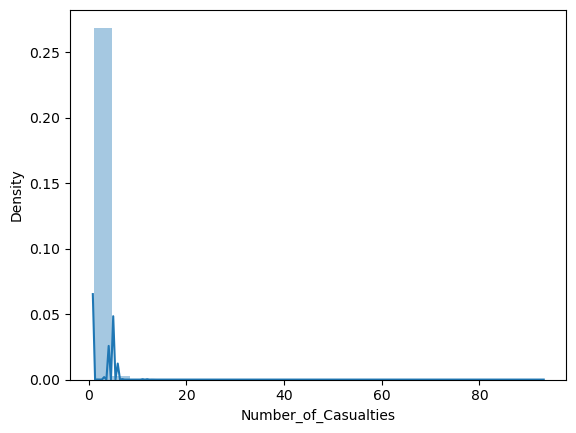

In [13]:
#Shows the distribution of casualties, looking for any extreme values


sns.distplot(accidents_df['Number_of_Casualties'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

#Evaluates the mean, median, and maximum value of casualties, understanding the data's central tendency and potential outliers


In [14]:
accidents_df['Number_of_Casualties'].mean() # Check the mean

1.3790963448359734

In [15]:
accidents_df['Number_of_Casualties'].median() # Check the median

1.0

In [16]:
accidents_df['Number_of_Casualties'].max() # Check the max

93

# 3.Data Preparation for regression analysis

#Displays a scatter plot to explore the correlation between casualties and vehicles involved in accidents


/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


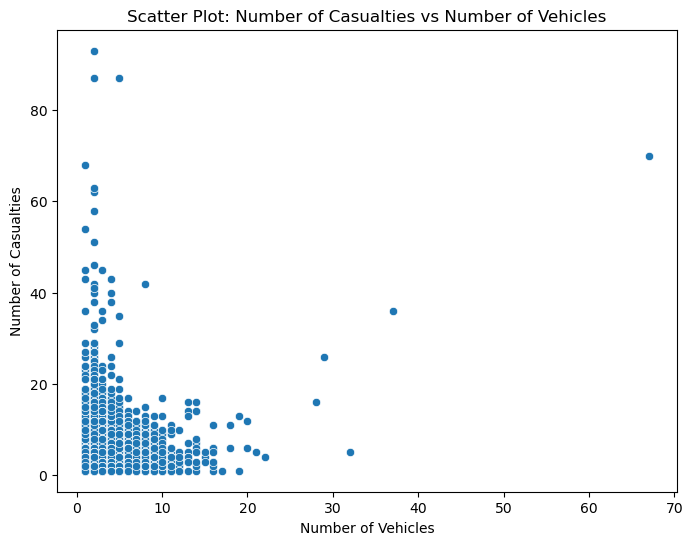

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number_of_Vehicles', y='Number_of_Casualties', data=accidents_df)
plt.title('Scatter Plot: Number of Casualties vs Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.show()

#Visualizes the regression line representing the relationship between vehicles and casualties on the test set

# Reshapes the 'Number_of_Vehicles' data into a NumPy array for independent variable X
# and 'Number_of_Casualties' into a NumPy array for dependent variable y


In [18]:
 ##Reshape variables into NumPy arrays
X = accidents_df['Number_of_Vehicles'].values.reshape(-1, 1)
y = accidents_df['Number_of_Casualties'].values



In [19]:
X

array([[1],
       [2],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [20]:
y

array([1, 1, 1, ..., 1, 3, 2])

# Splits the data into training and test sets, allocating 70% for training and 30% for testing
# The 'random_state' parameter ensures reproducibility of the split


In [21]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

Initializing a Linear Regression model object


In [28]:
# Create and fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
#create linear regression object
regression = LinearRegression()

# Trains the Linear Regression model using the training data

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

#Fits the regression object to the training data


In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

##Uses the trained regression model to predict casualties based on the test set of vehicles


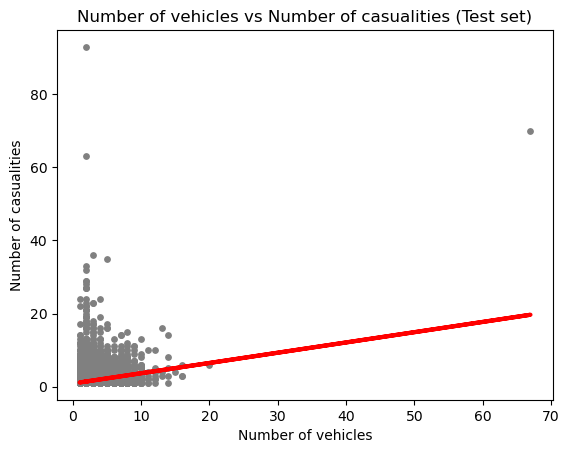

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt # Assigning the matplotlib.pyplot module to 'plot_test'

plot_test.scatter(X_test, y_test, color='gray', s = 15) # Scatter plot of actual test data (Number_of_Vehicles vs. Number_of_Casualties)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3) # Plotting the regression line (predicted values) on the same plot
# Adding title and axis labels to the plot
plot_test.title('Number of vehicles vs Number of casualities (Test set)')
plot_test.xlabel('Number of vehicles')
plot_test.ylabel('Number of casualities')
plot_test.show()

#Visualizes the actual test data and the regression line from the model based on Number_of_Vehicles and predicted Number_of_Casualties


In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.28102936]
Mean squared error:  0.7038074360750958
R2 score:  0.06524968239202211


#Computes performance metrics for evaluating the model's predictive accuracy

In [36]:
y_predicted

array([1.40124262, 1.12021326, 1.40124262, ..., 1.40124262, 1.12021326,
       1.40124262])

# Construct a DataFrame with columns 'Actual' and 'Predicted' to compare the actual (from test set) and predicted values of Number_of_Casualties


In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.401243
1,2,1.120213
2,2,1.401243
3,1,1.120213
4,1,1.120213
5,1,1.120213
6,2,1.120213
7,1,1.401243
8,1,1.401243
9,1,1.120213


# Compare how the regression fits the training set

#Generates predictions for casualties based on the number of vehicles in the training set (X_train) using the trained regression model

In [45]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [46]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.28102936]
Mean squared error:  0.698985150695216
R2 score:  0.05736618845445918


Model Performance Statistics:
Slope (Coefficient): The coefficient for the independent variable 'Number_of_Vehicles' is approximately 0.281, suggesting a positive relationship between the number of vehicles involved and the number of casualties.
Mean Squared Error (MSE): The MSE is calculated as approximately 0.699, indicating the average squared difference between the predicted and actual values. Lower values are preferable, signifying better model performance, but this value seems relatively high.
R-squared (R2) Score: The R2 score of approximately 0.057 implies that the model explains only about 5.7% of the variance in the dependent variable. This suggests that the model does not fit the data well.

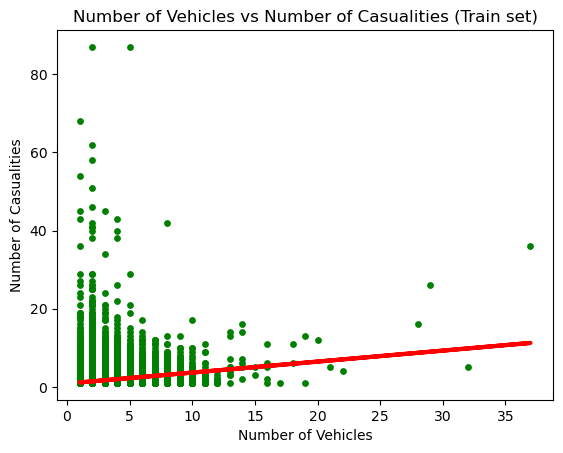

In [48]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Vehicles vs Number of Casualities (Train set)')
plot_test.xlabel('Number of Vehicles')
plot_test.ylabel('Number of Casualities')
plot_test.show()

Model Performance on the Test Set:
The model seems to perform poorly on the test set based on the high MSE and low R2 score. It indicates that the linear regression model might not be suitable for accurately predicting the number of casualties based solely on the number of vehicles involved in accidents in this dataset.

# Compare the predicted y values with the actual y values in a dataframe.

In [57]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.401243
1,2,1.120213
2,2,1.401243
3,1,1.120213
4,1,1.120213
5,1,1.120213
6,2,1.120213
7,1,1.401243
8,1,1.401243
9,1,1.120213


Comparison of Predicted vs Actual Values:
The provided table showcases the comparison between the actual number of casualties and the predicted values from the linear regression model. However, it's evident that the model predictions don't align closely with the actual values, as there are discrepancies between the predicted and observed casualties.


# Include any reflections you have on the impact of possible data bias.


Reflections on Possible Data Bias:
Model performance might be affected by various factors:

Missing Variables: Other crucial factors influencing casualties, not included in the model, might exist (e.g. road conditions, weather).

Data Quality: Incomplete or biased data can affect model predictions. Ensure data representativeness and accuracy.

Non-Linear Relationships: The relationship between variables might not be linear, affecting the model's fit.


In summary, the linear regression model based on the number of vehicles as an independent variable shows poor performance in predicting the number of casualties. The low R2 score and relatively high MSE suggest that this model might not adequately capture the complexities influencing casualties in traffic accidents. Further exploration of additional variables to improve predictive accuracy.
